In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.set_option('display.max_columns',None)

In [2]:
df =pd.read_excel(r"C:\Users\vinoth.k\Downloads\Application Status Data.xlsx")

In [3]:
df.head()

,APLN_NO,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP
0,1292862,19,Request for Property Ownership,27-AUG-2015 00:00:00,1,308,STEP_01,14-FEB-2017 11:35:44
1,1292863,19,Request for Property Ownership,27-AUG-2015 00:00:00,18,308,STEP_01,02-OCT-2017 13:03:26
2,1292863,19,Request for Property Ownership,27-AUG-2015 00:00:00,18,309,STEP_02,03-OCT-2017 12:52:35
3,1292863,19,Request for Property Ownership,27-AUG-2015 00:00:00,18,310,STEP_03,03-OCT-2017 12:52:47
4,1292863,19,Request for Property Ownership,27-AUG-2015 00:00:00,18,311,STEP_04,03-OCT-2017 12:52:54


In [4]:
# shape of the dataframe
df.shape

(381240, 8)

In [5]:
# data type of each column
df.dtypes

APLN_NO                    int64
APLN_CODE                  int64
APLN_DESC                 object
APLN_DATE                 object
CURR_STEP                  int64
ACTN_CODE                  int64
ACTN_CODE_STEP            object
LAST_UPDATED_TIMESTAMP    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381240 entries, 0 to 381239
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   APLN_NO                 381240 non-null  int64 
 1   APLN_CODE               381240 non-null  int64 
 2   APLN_DESC               381240 non-null  object
 3   APLN_DATE               381240 non-null  object
 4   CURR_STEP               381240 non-null  int64 
 5   ACTN_CODE               381240 non-null  int64 
 6   ACTN_CODE_STEP          381240 non-null  object
 7   LAST_UPDATED_TIMESTAMP  381240 non-null  object
dtypes: int64(4), object(4)
memory usage: 23.3+ MB


In [7]:
df.isnull().sum()

APLN_NO                   0
APLN_CODE                 0
APLN_DESC                 0
APLN_DATE                 0
CURR_STEP                 0
ACTN_CODE                 0
ACTN_CODE_STEP            0
LAST_UPDATED_TIMESTAMP    0
dtype: int64

In [8]:
df.describe()

,APLN_NO,APLN_CODE,CURR_STEP,ACTN_CODE
count,3.812400e+05,381240.0,381240.000000,381240.000000
mean,1.331660e+06,19.0,16.787294,314.017970
std,3.175127e+04,0.0,6.073463,14.440576
min,1.292862e+06,19.0,0.000000,220.000000
25%,1.306618e+06,19.0,14.000000,310.000000
50%,1.325299e+06,19.0,21.000000,315.000000
75%,1.340359e+06,19.0,21.000000,321.000000
max,1.435755e+06,19.0,21.000000,328.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6E9FBDA08>,
      dtype=object)

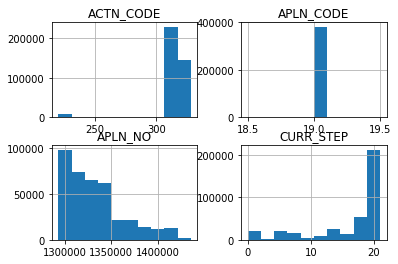

In [9]:
df.hist()

In [10]:
for i in df.columns:
    print("------------------------")
    print(i)
    print(df[i].unique())

------------------------
APLN_NO
[1292862 1292863 1292864 ... 1435576 1435713 1435755]
------------------------
APLN_CODE
[19]
------------------------
APLN_DESC
['Request for Property Ownership']
------------------------
APLN_DATE
['27-AUG-2015 00:00:00' '01-JUN-2015 00:00:00' '30-AUG-2015 00:00:00' ...
 '29-AUG-2019 00:00:00' '02-SEP-2019 00:00:00' '03-SEP-2019 00:00:00']
------------------------
CURR_STEP
[ 1 18 21 15 19  7 14  6 20 16 13  2 10  8 11  4  5  3  9 12 17  0]
------------------------
ACTN_CODE
[308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 220]
------------------------
ACTN_CODE_STEP
['STEP_01' 'STEP_02' 'STEP_03' 'STEP_04' 'STEP_05' 'STEP_06' 'STEP_07'
 'STEP_08' 'STEP_09' 'STEP_10' 'STEP_11' 'STEP_12' 'STEP_13' 'STEP_14'
 'STEP_15' 'STEP_16' 'STEP_17' 'STEP_18' 'STEP_19' 'STEP_20' 'STEP_21'
 'STEP_22']
------------------------
LAST_UPDATED_TIMESTAMP
['14-FEB-2017 11:35:44' '02-OCT-2017 13:03:26' '03-OCT-2017 12:52:35' ...
 '03-SE

In [11]:
#Changing the APLN_DATE and LAST_UPDATED_TIMESTAMP to pandas datetime
df['APLN_DATE'] = pd.to_datetime(df['APLN_DATE'])
df['LAST_UPDATED_TIMESTAMP'] = pd.to_datetime(df['LAST_UPDATED_TIMESTAMP'])

In [12]:
#Few applications have missing steps, here 1309853 for which STEP_02 and STEP_01 IS MISSING
df[df['APLN_NO']==1309853]

,APLN_NO,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP
113142,1309853,19,Request for Property Ownership,2015-12-20,21,310,STEP_03,2017-05-04 11:51:51
113143,1309853,19,Request for Property Ownership,2015-12-20,21,311,STEP_04,2017-05-04 11:57:23
113144,1309853,19,Request for Property Ownership,2015-12-20,21,312,STEP_05,2017-05-07 10:30:28
113145,1309853,19,Request for Property Ownership,2015-12-20,21,313,STEP_06,2017-05-07 10:31:21
113146,1309853,19,Request for Property Ownership,2015-12-20,21,314,STEP_07,2018-03-05 11:12:23
113147,1309853,19,Request for Property Ownership,2015-12-20,21,315,STEP_08,2018-03-05 11:17:50
113148,1309853,19,Request for Property Ownership,2015-12-20,21,316,STEP_09,2018-03-05 11:26:08
113149,1309853,19,Request for Property Ownership,2015-12-20,21,317,STEP_10,2018-03-05 11:27:08
113150,1309853,19,Request for Property Ownership,2015-12-20,21,318,STEP_11,2018-03-08 11:21:34
113151,1309853,19,Request for Property Ownership,2015-12-20,21,319,STEP_12,2018-03-11 12:20:33


In [13]:
df.head(30)

,APLN_NO,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP
0,1292862,19,Request for Property Ownership,2015-08-27,1,308,STEP_01,2017-02-14 11:35:44
1,1292863,19,Request for Property Ownership,2015-08-27,18,308,STEP_01,2017-10-02 13:03:26
2,1292863,19,Request for Property Ownership,2015-08-27,18,309,STEP_02,2017-10-03 12:52:35
3,1292863,19,Request for Property Ownership,2015-08-27,18,310,STEP_03,2017-10-03 12:52:47
4,1292863,19,Request for Property Ownership,2015-08-27,18,311,STEP_04,2017-10-03 12:52:54
5,1292863,19,Request for Property Ownership,2015-08-27,18,312,STEP_05,2017-10-03 12:53:01
6,1292863,19,Request for Property Ownership,2015-08-27,18,313,STEP_06,2017-10-03 12:53:09
7,1292863,19,Request for Property Ownership,2015-08-27,18,314,STEP_07,2017-10-05 09:59:21
8,1292863,19,Request for Property Ownership,2015-08-27,18,315,STEP_08,2017-10-05 10:00:24
9,1292863,19,Request for Property Ownership,2015-08-27,18,316,STEP_09,2017-10-05 10:00:41


In [14]:
pivoted = df.pivot(index='APLN_NO', columns='ACTN_CODE_STEP', values=['LAST_UPDATED_TIMESTAMP'])

In [15]:
pivoted.columns = ['_'.join(str(s).strip() for s in col if s) for col in pivoted.columns]

In [16]:
pivoted.columns.name=None

In [17]:
pivoted

,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22
APLN_NO,,,,,,,,,,,,,,,,,,,,,,
1292862,2017-02-14 11:35:44,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1292863,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT
1292864,2017-02-14 11:45:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1292865,2016-08-15 11:02:52,2017-12-14 12:03:07,2018-01-07 09:14:19,2018-01-08 11:46:36,2018-01-08 11:56:45,2018-01-08 13:07:29,2018-01-29 12:58:02,2018-02-01 09:32:40,2018-02-01 09:33:02,2018-02-08 09:10:43,2018-02-08 10:28:26,2018-02-08 10:32:07,2018-02-11 11:37:41,2018-02-15 09:27:19,2018-03-18 09:47:44,2018-03-21 09:13:36,2018-03-28 07:16:25,2018-04-01 12:52:30,2018-04-02 12:38:02,2018-05-15 09:19:09,2018-05-15 14:17:54,2018-06-04 10:24:34
1292866,2018-12-13 07:58:45,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435509,2019-09-03 11:34:31,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1435527,2019-09-02 09:10:59,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1435576,2019-09-03 11:28:45,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [18]:
pivoted['LAST_UPDATED_TIMESTAMP_STEP_02'].isnull().sum()

19528

In [19]:
dfnew = pd.merge(df,pivoted, on=["APLN_NO", "APLN_NO"])

In [20]:
dfnew.head(10)

,APLN_NO,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22
0,1292862,19,Request for Property Ownership,2015-08-27,1,308,STEP_01,2017-02-14 11:35:44,2017-02-14 11:35:44,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,1292863,19,Request for Property Ownership,2015-08-27,18,308,STEP_01,2017-10-02 13:03:26,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT
2,1292863,19,Request for Property Ownership,2015-08-27,18,309,STEP_02,2017-10-03 12:52:35,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT
3,1292863,19,Request for Property Ownership,2015-08-27,18,310,STEP_03,2017-10-03 12:52:47,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT
4,1292863,19,Request for Property Ownership,2015-08-27,18,311,STEP_04,2017-10-03 12:52:54,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT
5,1292863,19,Request for Property Ownership,2015-08-27,18,312,STEP_05,2017-10-03 12:53:01,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT
6,1292863,19,Request for Property Ownership,2015-08-27,18,313,STEP_06,2017-10-03 12:53:09,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT
7,1292863,19,Request for Property Ownership,2015-08-27,18,314,STEP_07,2017-10-05 09:59:21,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,20

In [21]:
dfnew['ACTN_CODE_STEP'].value_counts()

STEP_01    43956
STEP_02    24430
STEP_03    23359
STEP_04    22914
STEP_05    22623
STEP_06    22003
STEP_07    19142
STEP_08    17371
STEP_09    16974
STEP_10    16806
STEP_11    16468
STEP_12    15965
STEP_13    15710
STEP_14    15157
STEP_15    13825
STEP_16    13448
STEP_17    12969
STEP_18    12891
STEP_19     9998
STEP_20     9026
STEP_21     8863
STEP_22     7342
Name: ACTN_CODE_STEP, dtype: int64

In [22]:
dfnew= dfnew.groupby('APLN_NO').nth(0) 

In [23]:
Trainfinal_df = dfnew.loc[dfnew['CURR_STEP'] == 21]

In [24]:
Trainfinal_df.isna().any()

APLN_CODE                         False
APLN_DESC                         False
APLN_DATE                         False
CURR_STEP                         False
ACTN_CODE                         False
ACTN_CODE_STEP                    False
LAST_UPDATED_TIMESTAMP            False
LAST_UPDATED_TIMESTAMP_STEP_01     True
LAST_UPDATED_TIMESTAMP_STEP_02     True
LAST_UPDATED_TIMESTAMP_STEP_03     True
LAST_UPDATED_TIMESTAMP_STEP_04     True
LAST_UPDATED_TIMESTAMP_STEP_05     True
LAST_UPDATED_TIMESTAMP_STEP_06     True
LAST_UPDATED_TIMESTAMP_STEP_07     True
LAST_UPDATED_TIMESTAMP_STEP_08     True
LAST_UPDATED_TIMESTAMP_STEP_09     True
LAST_UPDATED_TIMESTAMP_STEP_10     True
LAST_UPDATED_TIMESTAMP_STEP_11     True
LAST_UPDATED_TIMESTAMP_STEP_12     True
LAST_UPDATED_TIMESTAMP_STEP_13     True
LAST_UPDATED_TIMESTAMP_STEP_14     True
LAST_UPDATED_TIMESTAMP_STEP_15     True
LAST_UPDATED_TIMESTAMP_STEP_16     True
LAST_UPDATED_TIMESTAMP_STEP_17     True
LAST_UPDATED_TIMESTAMP_STEP_18     True


In [25]:
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_17 =Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_16.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_18)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_16  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_16.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_17)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_15  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_15.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_16)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_14  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_14.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_15)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_13  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_13.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_14)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_12  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_12.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_13)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_11  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_11.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_12)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_10  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_10.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_11)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_09  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_09.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_10)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_08  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_08.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_09)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_07  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_07.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_08)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_06 = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_06.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_07)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_05  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_05.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_06)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_04  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_04.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_05)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_03  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_03.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_04)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_02  = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_02.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_03)
Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_01 = Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_01.fillna(Trainfinal_df.LAST_UPDATED_TIMESTAMP_STEP_02)

C:\Users\vinoth.k\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
#Creating a Target variable step18to22 as we need to predict the number of days which the application would
#take to complete from Step 18 to Step 22.

In [27]:
Trainfinal_df['step18to22'] =(Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_22'].sub(Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_18'],axis=0)).dt.days

C:\Users\vinoth.k\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
Trainfinal_df.isna().any()

APLN_CODE                         False
APLN_DESC                         False
APLN_DATE                         False
CURR_STEP                         False
ACTN_CODE                         False
ACTN_CODE_STEP                    False
LAST_UPDATED_TIMESTAMP            False
LAST_UPDATED_TIMESTAMP_STEP_01    False
LAST_UPDATED_TIMESTAMP_STEP_02    False
LAST_UPDATED_TIMESTAMP_STEP_03     True
LAST_UPDATED_TIMESTAMP_STEP_04     True
LAST_UPDATED_TIMESTAMP_STEP_05     True
LAST_UPDATED_TIMESTAMP_STEP_06     True
LAST_UPDATED_TIMESTAMP_STEP_07     True
LAST_UPDATED_TIMESTAMP_STEP_08     True
LAST_UPDATED_TIMESTAMP_STEP_09     True
LAST_UPDATED_TIMESTAMP_STEP_10     True
LAST_UPDATED_TIMESTAMP_STEP_11     True
LAST_UPDATED_TIMESTAMP_STEP_12     True
LAST_UPDATED_TIMESTAMP_STEP_13     True
LAST_UPDATED_TIMESTAMP_STEP_14     True
LAST_UPDATED_TIMESTAMP_STEP_15     True
LAST_UPDATED_TIMESTAMP_STEP_16     True
LAST_UPDATED_TIMESTAMP_STEP_17     True
LAST_UPDATED_TIMESTAMP_STEP_18     True


In [29]:
Trainfinal_df.head()

,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22,step18to22
APLN_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1292865,19,Request for Property Ownership,2015-08-27,21,308,STEP_01,2016-08-15 11:02:52,2016-08-15 11:02:52,2017-12-14 12:03:07,2018-01-07 09:14:19,2018-01-08 11:46:36,2018-01-08 11:56:45,2018-01-08 13:07:29,2018-01-29 12:58:02,2018-02-01 09:32:40,2018-02-01 09:33:02,2018-02-08 09:10:43,2018-02-08 10:28:26,2018-02-08 10:32:07,2018-02-11 11:37:41,2018-02-15 09:27:19,2018-03-18 09:47:44,2018-03-21 09:13:36,2018-03-21 09:13:36,2018-04-01 12:52:30,2018-04-02 12:38:02,2018-05-15 09:19:09,2018-05-15 14:17:54,2018-06-04 10:24:34,63.0
1292870,19,Request for Property Ownership,2015-08-27,21,308,STEP_01,2016-07-25 07:47:16,2016-07-25 07:47:16,2018-03-20 14:17:56,2018-05-08 14:35:30,2018-05-08 14:52:04,2018-05-08 14:55:10,2018-05-10 10:31:59,2018-05-10 11:37:11,2018-05-23 15:01:21,2018-05-23 15:50:56,2018-06-26 13:27:32,2018-07-04 12:51:27,2018-07-05 08:28:28,2018-07-05 10:46:46,2018-07-09 08:35:24,2018-07-09 13:39:47,2018-07-10 08:19:23,2018-07-10 08:19:23,2018-08-06 13:23:25,2018-08-16 13:37:11,2018-09-16 09:18:09,2018-09-19 10:34:03,2018-10-28 11:42:03,82.0
1292873,19,Request for Property Ownership,2015-08-27,21,308,STEP_01,2018-06-04 10:38:19,2018-06-04 10:38:19,2018-06-04 11:43:09,2018-06-26 10:37:18,2018-07-18 13:20:32,2018-07-18 13:22:17,2018-07-18 13:24:24,2018-09-05 07:56:35,2018-09-05 08:18:10,2018-09-05 08:18:25,2018-09-10 09:19:59,2018-09-10 10:48:11,2018-09-10 11:07:59,2018-09-13 10:19:29,2018-09-27 08:21:13,2018-10-21 07:41:39,2018-10-22 07:27:27,2018-10-22 07:27:27,2018-11-04 08:18:57,2018-11-04 10:23:14,2018-11-14 11:17:50,2018-11-15 08:08:18,2018-11-25 10:59:32,21.0
1292880,19,Request for Property Ownership,2015-08-27,21,308,STEP_01,2017-10-18 09:21:09,2017-10-18 09:21:09,2018-02-28 13:13:36,2018-03-18 09:10:16,2018-03-18 13:08:59,2018-03-18 13:14:55,2018-03-18 13:33:33,2018-05-22 10:44:36,2018-05-22 12:11:55,2018-05-22 12:16:44,2018-05-22 14:17:21,2018-08-01 12:33:18,2018-08-01 12:40:45,2018-08-02 09:27:39,2018-09-10 08:19:53,2018-10-04 08:31:20,2018-10-22 06:56:55,2018-10-22 06:56:55,2018-11-04 09:28:41,2018-11-29 11:40:45,2018-12-13 08:40:06,2018-12-13 08:51:20,2018-12-23 09:45:02,49.0
1292881,19,Request for Property Ownership,2015-08-27,21,308,STEP_01,2017-07-17 12:45:48,2017-07-17 12:45:48,2017-10-30 14:55:55,2017-11-20 08:53:16,2017-11-21 09:31:39,2017-12-06 12:30:34,2017-12-19 09:51:38,2018-01-04 12:42:14,2018-01-09 09:32:45,2018-01-09 09:33:29,2018-01-09 09:33:47,2018-01-09 10:26:31,2018-01-29 08:46:49,2018-01-31 12:19:57,2018-02-04 09:13:51,2018-02-08 13:13:23,2018-03-21 12:11:14,2018-03-21 12:11:14,2018-04-01 12:41:18,2018-07-05 12:20:27,2018-09-02 11:36:54,2018-10-09 10:15:04,2018-11-29 10:15:06,241.0


In [30]:
Trainfinal_df.loc[1309853:]

,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22,step18to22
APLN_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1309853,19,Request for Property Ownership,2015-12-20,21,310,STEP_03,2017-05-04 11:51:51,2017-05-04 11:51:51,2017-05-04 11:51:51,2017-05-04 11:51:51,2017-05-04 11:57:23,2017-05-07 10:30:28,2017-05-07 10:31:21,2018-03-05 11:12:23,2018-03-05 11:17:50,2018-03-05 11:26:08,2018-03-05 11:27:08,2018-03-08 11:21:34,2018-03-11 12:20:33,2018-03-14 11:01:51,2018-03-18 10:04:07,2018-03-29 09:25:36,2018-04-03 09:32:37,2018-04-03 09:32:37,2018-04-19 12:53:59,2018-05-02 11:06:37,2018-11-04 07:15:43,2018-11-04 07:15:43,2018-11-04 08:06:38,198.0
1309872,19,Request for Property Ownership,2015-06-11,21,308,STEP_01,2016-07-14 09:19:19,2016-07-14 09:19:19,2016-12-07 11:39:01,2016-12-13 10:09:06,2016-12-19 10:38:52,2016-12-21 08:35:34,2016-12-22 08:11:42,2017-03-09 07:31:25,2017-03-20 09:19:23,2017-03-20 09:19:40,2017-05-14 11:10:16,2017-07-04 08:37:04,2017-07-04 08:57:00,2017-07-05 10:22:18,2017-07-20 10:44:03,2017-09-10 12:22:45,2017-09-20 13:17:07,2017-09-20 13:17:07,2017-10-11 09:12:12,2017-10-12 09:21:11,2017-10-18 13:46:11,2017-11-08 10:09:21,2017-11-08 10:10:08,28.0
1309874,19,Request for Property Ownership,2015-12-20,21,308,STEP_01,2017-07-31 14:04:43,2017-07-31 14:04:43,2019-03-19 07:02:25,2018-05-10 10:39:43,2018-05-13 13:35:07,2018-05-13 13:43:24,2018-06-20 12:13:26,2018-11-18 09:47:38,2018-12-20 08:27:40,2018-12-25 08:36:03,2018-12-26 08:18:41,2018-12-26 08:37:03,2018-12-26 08:44:31,2018-12-27 10:08:09,2019-01-01 09:04:03,2019-02-03 11:57:09,2019-02-06 08:39:14,2019-02-06 08:39:14,2019-02-18 13:19:04,2019-02-27 12:28:49,2019-03-19 08:33:08,2019-03-19 08:51:01,NaT,NaN
1309876,19,Request for Property Ownership,2015-12-20,21,308,STEP_01,2018-01-01 11:54:32,2018-01-01 11:54:32,2018-01-07 10:20:37,2018-01-07 10:20:46,2018-01-07 10:20:53,2018-01-07 10:20:59,2018-01-07 10:21:09,2018-01-18 09:08:46,2018-01-18 09:09:49,2018-01-18 09:10:12,2018-01-18 09:10:29,2018-01-28 13:05:22,2018-01-28 13:50:09,2018-02-21 12:58:38,2018-03-01 09:26:53,2018-03-15 12:45:13,2018-03-21 08:17:40,2018-03-21 08:17:40,2018-04-01 12:37:43,2018-04-10 09:51:57,2018-11-11 10:29:45,2018-11-11 10:29:45,NaT,NaN
1309882,19,Request for Property Ownership,2015-06-11,21,308,STEP_01,2016-10-23 09:30:09,2016-10-23 09:30:09,2017-10-25 14:47:07,2017-10-26 08:36:42,2017-10-26 08:40:57,2017-10-26 08:45:19,2017-10-29 10:01:34,2017-10-29 10:14:55,2017-12-14 11:22:38,2017-12-14 11:23:13,2017-12-17 08:29:46,2018-01-02 09:46:02,2018-01-02 10:05:57,2018-01-03 09:21:55,2018-01-18 09:08:18,2018-02-15 11:01:15,2018-03-21 08:42:02,2018-03-21 08:42:02,2018-04-01 12:45:00,2018-04-09 10:00:06,2018-07-01 09:35:04,2018-07-02 10:15:46,2018-07-08 11:46:18,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421034,19,Request for Property Ownership,2019-03-11,21,308,STEP_01,2019-03-12 09:25:46,2019-03-12 09:25:46,2019-03-27 09:03:27,2019-03-27 09:06:05,2019-03-27 09:10:41,2019-03-27 09:19:55,2019-03-28 08:21:40,2019-03-28 12:24:42,2019-03-28 12:33:20,2019-03-28 12:33:30,2019-03-28 12:47:20,2019-03-31 08:28:23,2019-03-31 08:59:37,2019-03-31 13:57:39,2019-04-02 08:50:35,2019-04-22 12:18:42,2019-04-23 09:32:06,2019-04-23 09:32

In [31]:
#Creating dataset that to be predicted for those applications that stands in Current step18
predictdataset = Trainfinal_df.loc[Trainfinal_df['CURR_STEP'] == 18]

In [32]:
Trainfinal_df =Trainfinal_df.dropna(subset=['step18to22'])

In [33]:
Trainfinal_df.head()

,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22,step18to22
APLN_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1292865,19,Request for Property Ownership,2015-08-27,21,308,STEP_01,2016-08-15 11:02:52,2016-08-15 11:02:52,2017-12-14 12:03:07,2018-01-07 09:14:19,2018-01-08 11:46:36,2018-01-08 11:56:45,2018-01-08 13:07:29,2018-01-29 12:58:02,2018-02-01 09:32:40,2018-02-01 09:33:02,2018-02-08 09:10:43,2018-02-08 10:28:26,2018-02-08 10:32:07,2018-02-11 11:37:41,2018-02-15 09:27:19,2018-03-18 09:47:44,2018-03-21 09:13:36,2018-03-21 09:13:36,2018-04-01 12:52:30,2018-04-02 12:38:02,2018-05-15 09:19:09,2018-05-15 14:17:54,2018-06-04 10:24:34,63.0
1292870,19,Request for Property Ownership,2015-08-27,21,308,STEP_01,2016-07-25 07:47:16,2016-07-25 07:47:16,2018-03-20 14:17:56,2018-05-08 14:35:30,2018-05-08 14:52:04,2018-05-08 14:55:10,2018-05-10 10:31:59,2018-05-10 11:37:11,2018-05-23 15:01:21,2018-05-23 15:50:56,2018-06-26 13:27:32,2018-07-04 12:51:27,2018-07-05 08:28:28,2018-07-05 10:46:46,2018-07-09 08:35:24,2018-07-09 13:39:47,2018-07-10 08:19:23,2018-07-10 08:19:23,2018-08-06 13:23:25,2018-08-16 13:37:11,2018-09-16 09:18:09,2018-09-19 10:34:03,2018-10-28 11:42:03,82.0
1292873,19,Request for Property Ownership,2015-08-27,21,308,STEP_01,2018-06-04 10:38:19,2018-06-04 10:38:19,2018-06-04 11:43:09,2018-06-26 10:37:18,2018-07-18 13:20:32,2018-07-18 13:22:17,2018-07-18 13:24:24,2018-09-05 07:56:35,2018-09-05 08:18:10,2018-09-05 08:18:25,2018-09-10 09:19:59,2018-09-10 10:48:11,2018-09-10 11:07:59,2018-09-13 10:19:29,2018-09-27 08:21:13,2018-10-21 07:41:39,2018-10-22 07:27:27,2018-10-22 07:27:27,2018-11-04 08:18:57,2018-11-04 10:23:14,2018-11-14 11:17:50,2018-11-15 08:08:18,2018-11-25 10:59:32,21.0
1292880,19,Request for Property Ownership,2015-08-27,21,308,STEP_01,2017-10-18 09:21:09,2017-10-18 09:21:09,2018-02-28 13:13:36,2018-03-18 09:10:16,2018-03-18 13:08:59,2018-03-18 13:14:55,2018-03-18 13:33:33,2018-05-22 10:44:36,2018-05-22 12:11:55,2018-05-22 12:16:44,2018-05-22 14:17:21,2018-08-01 12:33:18,2018-08-01 12:40:45,2018-08-02 09:27:39,2018-09-10 08:19:53,2018-10-04 08:31:20,2018-10-22 06:56:55,2018-10-22 06:56:55,2018-11-04 09:28:41,2018-11-29 11:40:45,2018-12-13 08:40:06,2018-12-13 08:51:20,2018-12-23 09:45:02,49.0
1292881,19,Request for Property Ownership,2015-08-27,21,308,STEP_01,2017-07-17 12:45:48,2017-07-17 12:45:48,2017-10-30 14:55:55,2017-11-20 08:53:16,2017-11-21 09:31:39,2017-12-06 12:30:34,2017-12-19 09:51:38,2018-01-04 12:42:14,2018-01-09 09:32:45,2018-01-09 09:33:29,2018-01-09 09:33:47,2018-01-09 10:26:31,2018-01-29 08:46:49,2018-01-31 12:19:57,2018-02-04 09:13:51,2018-02-08 13:13:23,2018-03-21 12:11:14,2018-03-21 12:11:14,2018-04-01 12:41:18,2018-07-05 12:20:27,2018-09-02 11:36:54,2018-10-09 10:15:04,2018-11-29 10:15:06,241.0


In [34]:
Trainfinal_df.isna().any()

APLN_CODE                         False
APLN_DESC                         False
APLN_DATE                         False
CURR_STEP                         False
ACTN_CODE                         False
ACTN_CODE_STEP                    False
LAST_UPDATED_TIMESTAMP            False
LAST_UPDATED_TIMESTAMP_STEP_01    False
LAST_UPDATED_TIMESTAMP_STEP_02    False
LAST_UPDATED_TIMESTAMP_STEP_03    False
LAST_UPDATED_TIMESTAMP_STEP_04    False
LAST_UPDATED_TIMESTAMP_STEP_05    False
LAST_UPDATED_TIMESTAMP_STEP_06    False
LAST_UPDATED_TIMESTAMP_STEP_07    False
LAST_UPDATED_TIMESTAMP_STEP_08    False
LAST_UPDATED_TIMESTAMP_STEP_09    False
LAST_UPDATED_TIMESTAMP_STEP_10    False
LAST_UPDATED_TIMESTAMP_STEP_11    False
LAST_UPDATED_TIMESTAMP_STEP_12    False
LAST_UPDATED_TIMESTAMP_STEP_13    False
LAST_UPDATED_TIMESTAMP_STEP_14    False
LAST_UPDATED_TIMESTAMP_STEP_15    False
LAST_UPDATED_TIMESTAMP_STEP_16    False
LAST_UPDATED_TIMESTAMP_STEP_17    False
LAST_UPDATED_TIMESTAMP_STEP_18    False


In [35]:
Trainfinal_df['Step1_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_01'] - Trainfinal_df['APLN_DATE']).dt.days
Trainfinal_df['Step2_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_02'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_01']).dt.days
Trainfinal_df['Step3_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_03'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_02']).dt.days
Trainfinal_df['Step4_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_04'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_03']).dt.days
Trainfinal_df['Step5_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_05'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_04']).dt.days
Trainfinal_df['Step6_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_06'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_05']).dt.days
Trainfinal_df['Step7_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_07'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_06']).dt.days
Trainfinal_df['Step8_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_08'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_07']).dt.days
Trainfinal_df['Step9_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_09'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_08']).dt.days
Trainfinal_df['Step10_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_10'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_09']).dt.days
Trainfinal_df['Step11_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_11'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_10']).dt.days
Trainfinal_df['Step12_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_12'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_11']).dt.days
Trainfinal_df['Step13_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_13'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_12']).dt.days
Trainfinal_df['Step14_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_14'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_13']).dt.days
Trainfinal_df['Step15_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_15'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_14']).dt.days
Trainfinal_df['Step16_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_16'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_15']).dt.days
Trainfinal_df['Step17_days'] = (Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_17'] - Trainfinal_df['LAST_UPDATED_TIMESTAMP_STEP_16']).dt.days

In [36]:
drop_cols = ['APLN_CODE','APLN_DESC','CURR_STEP', 'ACTN_CODE','LAST_UPDATED_TIMESTAMP']
Trainfinal_df.reset_index(drop=True, inplace=True)
Trainfinal_df.drop(drop_cols, axis = 1, inplace = True)

In [37]:
final_df11  = Trainfinal_df[['Step1_days','Step2_days','Step3_days','Step4_days','Step5_days','Step6_days','Step7_days','Step8_days','Step9_days','Step10_days','Step11_days','Step12_days','Step13_days','Step14_days','Step15_days','Step16_days','Step17_days','step18to22']]

In [38]:
final_df11.head()

,Step1_days,Step2_days,Step3_days,Step4_days,Step5_days,Step6_days,Step7_days,Step8_days,Step9_days,Step10_days,Step11_days,Step12_days,Step13_days,Step14_days,Step15_days,Step16_days,Step17_days,step18to22
0,354,486,23,1,0,0,20,2,0,6,0,0,3,3,31,2,0,63.0
1,333,603,49,0,0,1,0,13,0,33,7,0,0,3,0,0,0,82.0
2,1012,0,21,22,0,0,48,0,0,5,0,0,2,13,23,0,0,21.0
3,783,133,17,0,0,0,64,0,0,0,70,0,0,38,24,17,0,49.0
4,690,105,20,1,15,12,16,4,0,0,0,19,2,3,4,40,0,241.0


In [39]:
final_df11.isna().any()

Step1_days     False
Step2_days     False
Step3_days     False
Step4_days     False
Step5_days     False
Step6_days     False
Step7_days     False
Step8_days     False
Step9_days     False
Step10_days    False
Step11_days    False
Step12_days    False
Step13_days    False
Step14_days    False
Step15_days    False
Step16_days    False
Step17_days    False
step18to22     False
dtype: bool

In [40]:
final_df11.head()

,Step1_days,Step2_days,Step3_days,Step4_days,Step5_days,Step6_days,Step7_days,Step8_days,Step9_days,Step10_days,Step11_days,Step12_days,Step13_days,Step14_days,Step15_days,Step16_days,Step17_days,step18to22
0,354,486,23,1,0,0,20,2,0,6,0,0,3,3,31,2,0,63.0
1,333,603,49,0,0,1,0,13,0,33,7,0,0,3,0,0,0,82.0
2,1012,0,21,22,0,0,48,0,0,5,0,0,2,13,23,0,0,21.0
3,783,133,17,0,0,0,64,0,0,0,70,0,0,38,24,17,0,49.0
4,690,105,20,1,15,12,16,4,0,0,0,19,2,3,4,40,0,241.0


In [41]:
final_df11.columns = ['Step1_days','Step2_days','Step3_days','Step4_days','Step5_days','Step6_days','Step7_days','Step8_days','Step9_days','Step10_days','Step11_days','Step12_days','Step13_days','Step14_days','Step15_days','Step16_days','Step17_days','dv']

In [42]:
final_df11.reset_index(drop=True, inplace=True)

In [43]:
final_df11

,Step1_days,Step2_days,Step3_days,Step4_days,Step5_days,Step6_days,Step7_days,Step8_days,Step9_days,Step10_days,Step11_days,Step12_days,Step13_days,Step14_days,Step15_days,Step16_days,Step17_days,dv
0,354,486,23,1,0,0,20,2,0,6,0,0,3,3,31,2,0,63.0
1,333,603,49,0,0,1,0,13,0,33,7,0,0,3,0,0,0,82.0
2,1012,0,21,22,0,0,48,0,0,5,0,0,2,13,23,0,0,21.0
3,783,133,17,0,0,0,64,0,0,0,70,0,0,38,24,17,0,49.0
4,690,105,20,1,15,12,16,4,0,0,0,19,2,3,4,40,0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7322,1,14,0,0,0,0,0,0,0,0,2,0,0,1,20,0,0,35.0
7323,70,0,4,0,0,4,3,0,0,43,0,3,2,1,39,0,0,16.0
7324,40,0,24,0,0,4,0,0,0,0,0,0,0,1,16,0,0,40.0
7325,161,4,28,0,0,0,1,0,0,0,0,0,21,0,0,9,0,19.0


In [44]:
final_df11.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7327 entries, 0 to 7326
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Step1_days   7327 non-null   int64  
 1   Step2_days   7327 non-null   int64  
 2   Step3_days   7327 non-null   int64  
 3   Step4_days   7327 non-null   int64  
 4   Step5_days   7327 non-null   int64  
 5   Step6_days   7327 non-null   int64  
 6   Step7_days   7327 non-null   int64  
 7   Step8_days   7327 non-null   int64  
 8   Step9_days   7327 non-null   int64  
 9   Step10_days  7327 non-null   int64  
 10  Step11_days  7327 non-null   int64  
 11  Step12_days  7327 non-null   int64  
 12  Step13_days  7327 non-null   int64  
 13  Step14_days  7327 non-null   int64  
 14  Step15_days  7327 non-null   int64  
 15  Step16_days  7327 non-null   int64  
 16  Step17_days  7327 non-null   int64  
 17  dv           7327 non-null   float64
dtypes: float64(1), int64(17)
memory usage: 1.0 MB


In [45]:

finaltrinsetdf=final_df11.mask(final_df11==0).fillna(final_df11.mean())

Analysed that 16th and 17th step are done in a same day in less amount of time, so populating the same value of 16th step to 17

In [46]:
finaltrinsetdf.Step17_days  = finaltrinsetdf.Step17_days.mask(finaltrinsetdf.Step17_days==0.0).fillna(finaltrinsetdf.Step16_days)

In [47]:
finaltrinsetdf.head()

,Step1_days,Step2_days,Step3_days,Step4_days,Step5_days,Step6_days,Step7_days,Step8_days,Step9_days,Step10_days,Step11_days,Step12_days,Step13_days,Step14_days,Step15_days,Step16_days,Step17_days,dv
0,354.0,486.000000,23.0,1.000000,8.074655,10.871434,20.000000,2.000000,6.170056,6.000000,11.695783,8.138938,3.000000,3.0,31.000000,2.000000,2.000000,63.0
1,333.0,603.000000,49.0,9.607752,8.074655,1.000000,36.488194,13.000000,6.170056,33.000000,7.000000,8.138938,5.410946,3.0,22.683226,9.561758,9.561758,82.0
2,1012.0,224.861062,21.0,22.000000,8.074655,10.871434,48.000000,24.499386,6.170056,5.000000,11.695783,8.138938,2.000000,13.0,23.000000,9.561758,9.561758,21.0
3,783.0,133.000000,17.0,9.607752,8.074655,10.871434,64.000000,24.499386,6.170056,7.601201,70.000000,8.138938,5.410946,38.0,24.000000,17.000000,17.000000,49.0
4,690.0,105.000000,20.0,1.000000,15.000000,12.000000,16.000000,4.000000,6.170056,7.601201,11.695783,19.000000,2.000000,3.0,4.000000,40.000000,40.000000,241.0


In [48]:
finaltrinsetdf

,Step1_days,Step2_days,Step3_days,Step4_days,Step5_days,Step6_days,Step7_days,Step8_days,Step9_days,Step10_days,Step11_days,Step12_days,Step13_days,Step14_days,Step15_days,Step16_days,Step17_days,dv
0,354.0,486.000000,23.000000,1.000000,8.074655,10.871434,20.000000,2.000000,6.170056,6.000000,11.695783,8.138938,3.000000,3.000000,31.000000,2.000000,2.000000,63.0
1,333.0,603.000000,49.000000,9.607752,8.074655,1.000000,36.488194,13.000000,6.170056,33.000000,7.000000,8.138938,5.410946,3.000000,22.683226,9.561758,9.561758,82.0
2,1012.0,224.861062,21.000000,22.000000,8.074655,10.871434,48.000000,24.499386,6.170056,5.000000,11.695783,8.138938,2.000000,13.000000,23.000000,9.561758,9.561758,21.0
3,783.0,133.000000,17.000000,9.607752,8.074655,10.871434,64.000000,24.499386,6.170056,7.601201,70.000000,8.138938,5.410946,38.000000,24.000000,17.000000,17.000000,49.0
4,690.0,105.000000,20.000000,1.000000,15.000000,12.000000,16.000000,4.000000,6.170056,7.601201,11.695783,19.000000,2.000000,3.000000,4.000000,40.000000,40.000000,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7322,1.0,14.000000,0.484509,9.607752,8.074655,10.871434,36.488194,24.499386,6.170056,7.601201,2.000000,8.138938,5.410946,1.000000,20.000000,9.561758,9.561758,35.0
7323,70.0,224.861062,4.000000,9.607752,8.074655,4.000000,3.000000,24.499386,6.170056,43.000000,11.695783,3.000000,2.000000,1.000000,39.000000,9.561758,9.561758,16.0
7324,40.0,224.861062,24.000000,9.607752,8.074655,4.000000,36.488194,24.499386,6.170056,7.601201,11.695783,8.138938,5.410946,1.000000,16.000000,9.561758,9.561758,40.0
7325,161.0,4.000000,28.000000,9.607752,8.074655,10.871434,1.000000,24.499386,6.170056,7.601201,11.695783,8.138938,21.000000,14.102088,22.683226,9.000000,9.000000,19.0


In [49]:
finaltrinsetdf.isna().any()

Step1_days     False
Step2_days     False
Step3_days     False
Step4_days     False
Step5_days     False
Step6_days     False
Step7_days     False
Step8_days     False
Step9_days     False
Step10_days    False
Step11_days    False
Step12_days    False
Step13_days    False
Step14_days    False
Step15_days    False
Step16_days    False
Step17_days    False
dv             False
dtype: bool

In [50]:
finaltrinsetdf.describe()

,Step1_days,Step2_days,Step3_days,Step4_days,Step5_days,Step6_days,Step7_days,Step8_days,Step9_days,Step10_days,Step11_days,Step12_days,Step13_days,Step14_days,Step15_days,Step16_days,Step17_days,dv
count,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000
mean,485.696772,244.103301,0.633228,12.687950,12.516983,15.012580,45.880406,32.728264,11.607486,11.903396,16.551600,13.149823,7.327338,14.764176,24.351885,10.869371,10.869371,88.957914
std,273.642888,205.187219,82.419312,14.940181,17.436503,25.234409,49.162840,48.660211,27.662609,15.990142,20.224108,22.752248,13.577271,25.878316,25.002848,13.951965,13.951965,83.906205
min,1.000000,1.000000,-806.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-151.000000,1.000000,1.000000,1.000000,1.000000,-456.000000,-83.000000,-83.000000,1.000000
25%,345.000000,68.000000,0.484509,6.000000,8.074655,4.000000,14.000000,10.000000,6.170056,7.601201,7.000000,8.138938,2.000000,4.000000,8.000000,4.000000,4.000000,33.000000
50%,457.000000,224.861062,4.000000,9.607752,8.074655,10.871434,36.488194,24.499386,6.170056,7.601201,11.695783,8.138938,5.410946,9.000000,21.000000,9.000000,9.000000,63.000000
75%,603.000000,367.000000,15.000000,13.000000,8.074655,10.871434,53.000000,24.499386,6.170056,7.601201,14.000000,8.138938,5.410946,18.000000,33.000000,12.000000,12.000000,114.000000
max,1368.000000,1067.000000,636.000000,216.000000,289.000000,434.000000,536.000000,557.000000,552.000000,179.000000,486.000000,483.000000,265.000000,643.000000,300.000000,324.000000,324.000000,801.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D68558C348>,
      dtype=object)

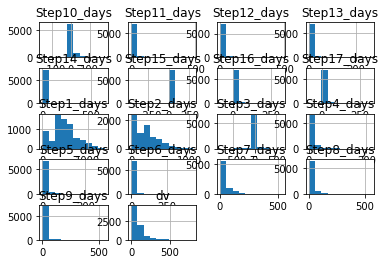

In [51]:
finaltrinsetdf.hist()

In [52]:
import seaborn as sns

Var_Corr = finaltrinsetdf.corr()['dv'][:-1]


In [53]:
Var_Corr

Step1_days     0.070015
Step2_days     0.030478
Step3_days    -0.130577
Step4_days    -0.019404
Step5_days    -0.004961
Step6_days     0.050246
Step7_days    -0.119196
Step8_days    -0.055403
Step9_days    -0.051113
Step10_days   -0.086361
Step11_days   -0.051670
Step12_days   -0.045206
Step13_days   -0.061228
Step14_days   -0.004715
Step15_days   -0.040726
Step16_days    0.005138
Step17_days    0.005138
Name: dv, dtype: float64

In [54]:
Var_Corrplot = finaltrinsetdf.corr()

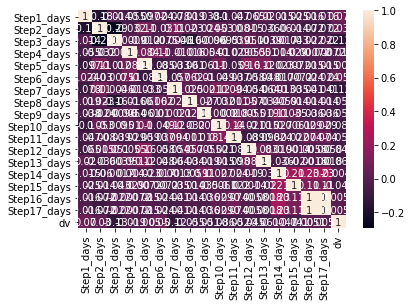

In [55]:
# plot the heatmap and annotation on it
sns.heatmap(Var_Corrplot, xticklabels=Var_Corrplot.columns, yticklabels=Var_Corrplot.columns, annot=True)

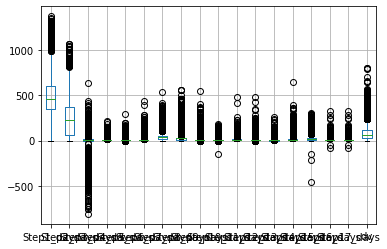

In [56]:
finaltrinsetdf.boxplot()

In [57]:
def outlier_Capping(dev):
    
    for col in dev.columns:
        
        Q1 = dev[col].quantile(0.25)
        Q3 = dev[col].quantile(0.75)
        IQR = Q3-Q1

 

        UW = Q3 + (1.5*IQR)
        LW = Q1 - (1.5*IQR)

 

        dev[col] = np.where(dev[col] < LW, LW, dev[col])
        dev[col] = np.where(dev[col] > UW, UW, dev[col])
        
    return dev

In [58]:
final_df = outlier_Capping(finaltrinsetdf)

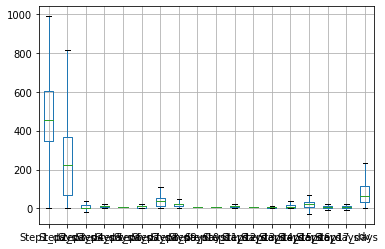

In [59]:
final_df.boxplot()

In [60]:
import xgboost

model = xgboost.XGBRegressor()

In [61]:
from sklearn.model_selection import train_test_split


In [62]:
X = final_df.drop('dv', axis = 1)
y = final_df['dv']

In [63]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.4,random_state=0)

In [64]:
X_train.shape, X_val.shape

((4396, 17), (2931, 17))

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_val)
X_train = scaler.transform(X_train)
X_val= scaler.transform(X_val)

In [66]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [67]:
y_pred = model.predict(X_val)

In [68]:
from sklearn.metrics import r2_score, mean_squared_error,f1_score
print("train r2 : ", r2_score(y_pred, y_val))

train r2 :  -0.855153496058084
